# Can we improve DCA?
When it comes to investing, DCA is one of the most popular strategies. With DCA you can stop looking at the charts, put a fixed quantity in the market of your choice, and watch your money grow long term without caring about volatility. But can we improve DCA while keeping its advantages?

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095
2020-01-06,7410.452148,7781.867188,7409.292969,7769.219238,7769.219238,23276261598
2020-01-07,7768.682129,8178.215820,7768.227539,8163.692383,8163.692383,28767291327
2020-01-08,8161.935547,8396.738281,7956.774414,8079.862793,8079.862793,31672559265
2020-01-09,8082.295898,8082.295898,7842.403809,7879.071289,7879.071289,24045990466


Text(0.5, 1.0, 'BTC price movement from 2020-01-01 to 2022-05-08')

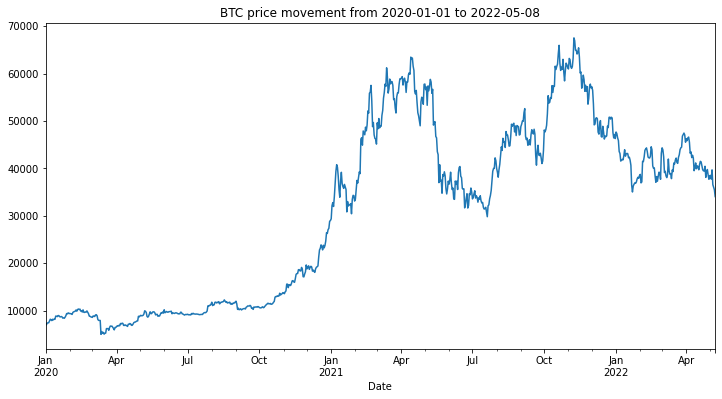

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')
from lib.data_load.csvs import get_asset_price_history
from lib.strategies import WeeklyDCA, MonthlyDCA, WeeklyFNGDCA, WeeklyCategoricalFNGDCA, WeeklyRollingZScoreDCA
# from lib.strategies import DCA, DummyFNGDCA, DummyRollingFNGDCA, DummyCategoricFNGDCA, RelativeMean, RelativeCategoricalMean, MeanFNGDCA

# Set experiment parameters

START = "2020-01-01"
END = "2022-05-08"
ASSET = "BTC"
WEEKLY_INVESTMENT = 100

# Collect BTC data

df = get_asset_price_history(ASSET, START, END)

display(df.head(10))

df.Close.plot(figsize=(12, 6))
plt.title(f"{ASSET} price movement from {START} to {END}")


In [5]:
experiments = []
strategies = {
    "weekly": {
        "params":["Monday", "Tuesday","Wednesday", "Thurstday", "Friday", "Saturday", "Sunday" ], 
        "strategies": [ WeeklyDCA, WeeklyFNGDCA, WeeklyCategoricalFNGDCA, WeeklyRollingZScoreDCA, ]
    },
    "monthly": {
        "params": list(range(1, 32)),
        "strategies": [ MonthlyDCA ]
    }
}

for k, v in strategies.items():
    for param in v["params"]:
        for strategy_class in v["strategies"]:
            investment = WEEKLY_INVESTMENT * 4 if k == "monthly" else WEEKLY_INVESTMENT
            strategy = strategy_class(investment, param)
            bt = strategy.backtest(strategy.apply(strategy.preprocess(df)))
            experiments.append(bt)
            
experiments = pd.DataFrame(experiments)

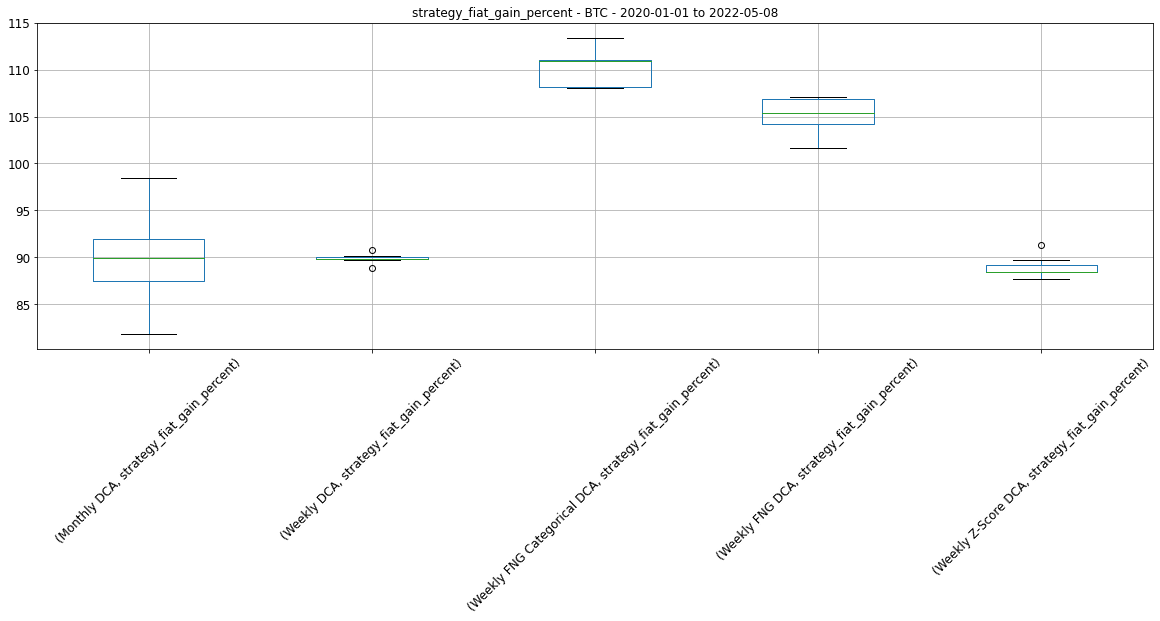

In [6]:

for c in ["strategy_fiat_gain_percent"]:
    experiments[["strategy", c]].groupby("strategy").boxplot(subplots=False, rot=45, fontsize=12, figsize=(20, 6))
    plt.title(f"{c} - {ASSET} - {START} to {END}")
    plt.show()
